In [10]:
#3 To - Do - Task
#- Basic Inspection and Exploration:
#Problem 1 - Data Read, Write and Inspect:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Level5/AI/week2/bank.csv')

print("DataFrame Info:")
dataset.info()

# (a) Identify columns with dtype=object
object_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(f"\n(a) Columns with dtype=object: {object_columns}")
print(f"Total object columns: {len(object_columns)}")

# (b) Unique values of those columns
print(f"\n(b) Unique values in object columns:")
for col in object_columns:
    unique_vals = dataset[col].unique()
    print(f"\n{col}:")
    print(f"  Number of unique values: {len(unique_vals)}")
    print(f"  Unique values: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")

# (c) Check for total number of null values in each column
print(f"\n(c) Null values in each column:")
null_counts = dataset.isnull().sum()
print(null_counts)

print("3. Dropping object columns and creating new DataFrame")
print("-" * 50)

# Create new DataFrame without object columns
df_numeric = dataset.select_dtypes(exclude=['object']).copy()
print(f"Original DataFrame shape: {dataset.shape}")
print(f"Numeric DataFrame shape: {df_numeric.shape}")
print(f"\nColumns in numeric DataFrame: {list(df_numeric.columns)}")

# Save to CSV
csv_filename = "banknumericdata.csv"
df_numeric.to_csv(csv_filename, index=False)
print(f"\nNumeric data saved to '{csv_filename}'")

# Read the saved CSV
df_numeric_read = pd.read_csv(csv_filename)
print(f"Successfully read '{csv_filename}'")
print(f"Shape: {df_numeric_read.shape}")

# Display summary statistics
print("\nSummary Statistics:")
print("=" * 60)

# Basic statistics
print("\nBasic Statistics:")
print(df_numeric_read.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtype

In [23]:
#4
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Level5/AI/week2/medicalStudents.csv')
# Load the data into a DataFrame

print("Dataset loaded successfully!")
print(f"Shape of dataset: {dataset.shape}")

# 2. Check info and identify columns with missing values
print("\n" + "=" * 70)
print("2. Checking DataFrame info and identifying missing values")
print("-" * 50)

print("DataFrame Info:")
dataset.info()

# Check for missing values
print("\nMissing values in each column:")
missing_values = dataset.isnull().sum()
print(missing_values)


if 'Age' in dataset.columns:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

if 'City' in dataset.columns:
    dataset['City'] = dataset['City'].fillna(dataset['City'].mode()[0])

duplicates = dataset.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

df = dataset.drop_duplicates()

print("\nCleaned DataFrame:")
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
Shape of dataset: (200000, 13)

2. Checking DataFrame info and identifying missing values
--------------------------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     1

In [31]:
#3.2
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Level5/AI/week2/Titanic-Dataset.csv')

df2 = dataset[['Name','Pclass','Sex','Age','Fare','Survived']]
df3 = df2[df2['Pclass'] == 1]
print("Mean Fare:", df3['Fare'].mean())
print("Median Fare:", df3['Fare'].median())
print("Minimum Fare:", df3['Fare'].min())
print("Maximum Fare:", df3['Fare'].max())

df3['Age'].isnull().sum()
df3 = df3.dropna(subset=['Age'])
df3.head()

# problem 3
embark=pd.get_dummies(dataset['Embarked'],prefix='Embarked')
df=pd.concat([dataset,embark],axis=1)
df=df.drop(columns=['Embarked'])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Minimum Fare: 0.0
Maximum Fare: 512.3292


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


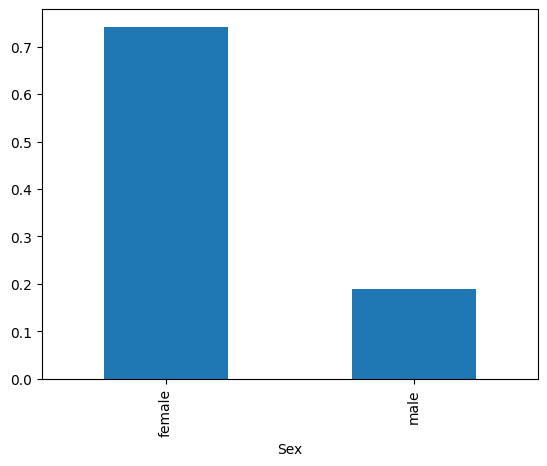

In [30]:
#problem 4
import matplotlib.pyplot as plt

df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

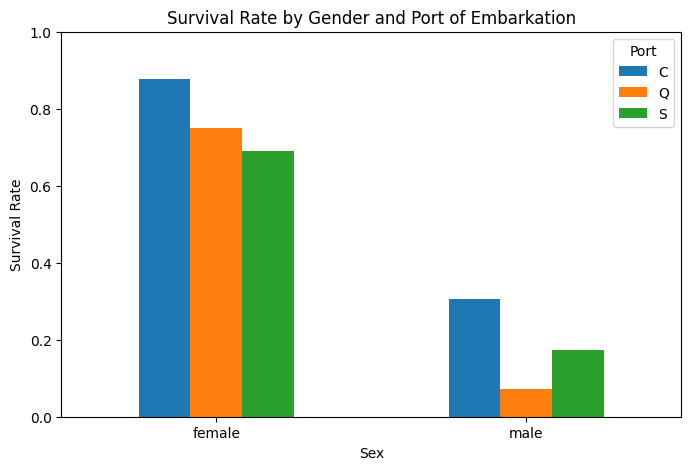

In [33]:
# Problem - 5:
survival_sex_port = dataset.groupby(['Sex','Embarked'])['Survived'].mean().unstack()

survival_sex_port.plot(kind='bar', figsize=(8,5))
plt.title('Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(title='Port')
plt.show()